In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# add the path to my packages to system paths so they can be imported
import sys
# sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/simgraph/code/my_packages')
sys.path.append('F:/Users/yasam/Documents/GitHub/simgraph/code/my_packages')
# sys.path.append('/home/yasamanparhizkar/Documents/thesis/code/my_packages')

import dataprocess.data_handler_03 as dh
# import rnn_assess as rnas
# import gru_assess as rnas
import lstm_assess as rnas
import load_data as ld

# Assess the GRU model for various training set sizes

# Load the data

In [2]:
# load all spike data from file
spikes_dp = '../../../local_data/original_files/spikes.npy'
grouped_data = ld.load_grouped_spikes(spikes_dp) # OR grouping
grouped_data.shape

(297, 1141, 1)

In [4]:
# data_params = ld.get_data_params('sift3d', grouped_data)
data_params = ld.get_data_params('mnist-sift', grouped_data)
print(data_params)

**Warning: Check the sampling rate.**

{'func': <function datapoint_sift at 0x000001A410CF6CA0>, 'lbl_func': <function get_mnist_labels at 0x000001A410CF7790>, 'features_dp': '../../data/fe_exp/mnist-sift/', 'spike_data': None, 'group_id': None, 'transform': <function transform_mnistsift at 0x000001A410CF7940>, 'ind_min': 0, 'ind_max': 13203, 'feature_id': 'mnist-sift'}


In [11]:
# ld.sr_sift3d = 2 # sampling rate
ld.sr_mnistsift = 4 # sampling rate

train_num = 10
val_num = 5

train_num, val_num, train_data, val_data = \
dh.random_train_val_balanced(train_num, val_num, data_params, seed=1342)

# show statistics
print('feature_id: ', data_params['feature_id'])
print('train_num = ', train_num, ', val_num = ', val_num)
print('number of features: ', train_data['des'].shape[1])
print('training data contains {} points ({:.2f}%) of label 1.'
      .format(np.sum(train_data['lbls'] == 1), np.sum(train_data['lbls'] == 1)*100/train_num))
print('validation data contains {} points ({:.2f}%) of label 1.'
      .format(np.sum(val_data['lbls'] == 1), np.sum(val_data['lbls'] == 1)*100/val_num))
# print('train_smpls = ', train_data['smpls'], '\nval_smpls = ', val_data['smpls'])
# print('train_lbls = ', train_data['lbls'], '\nval_lbls = ', val_data['lbls'])
# print('train_des = ', train_data['des'], '\nval_des = ', val_data['des'])

feature_id:  mnist-sift
train_num =  10 , val_num =  5
number of features:  64
training data contains 5 points (50.00%) of label 1.
validation data contains 2 points (40.00%) of label 1.


# Assess

In [12]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
learning_rate = 0.001
num_classes = 2
num_epochs = 150
# batch_size = 50

# 3d-sift
sequence_length = 32
input_size = 12
# mnist-sift
sequence_length = 2
input_size = 32

hidden_size = 128
num_layers = 1

seed = None # for random datapoint choice

In [13]:
# train_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
# val_num = 50

# test sizes
train_sizes = [40, 45, 50, 55, 60, 65, 70]
val_num = 50

train_its = 100
val_its = 10

In [14]:
val_acc_means, val_acc_stds = \
rnas.assess_rnn(train_sizes, val_num, train_its, val_its, data_params, sequence_length, 
               input_size, hidden_size, num_layers, num_classes, device, learning_rate, num_epochs,
               show_messages=False, seed=None)

train size: 40 iteration: 1/100
train size: 40 iteration: 2/100
train size: 40 iteration: 3/100
train size: 40 iteration: 4/100
train size: 40 iteration: 5/100
train size: 40 iteration: 6/100
train size: 40 iteration: 7/100
train size: 40 iteration: 8/100
train size: 40 iteration: 9/100
train size: 40 iteration: 10/100
train size: 40 iteration: 11/100
train size: 40 iteration: 12/100
train size: 40 iteration: 13/100
train size: 40 iteration: 14/100
train size: 40 iteration: 15/100
train size: 40 iteration: 16/100
train size: 40 iteration: 17/100
train size: 40 iteration: 18/100
train size: 40 iteration: 19/100
train size: 40 iteration: 20/100
train size: 40 iteration: 21/100
train size: 40 iteration: 22/100
train size: 40 iteration: 23/100
train size: 40 iteration: 24/100
train size: 40 iteration: 25/100
train size: 40 iteration: 26/100
train size: 40 iteration: 27/100
train size: 40 iteration: 28/100
train size: 40 iteration: 29/100
train size: 40 iteration: 30/100
train size: 40 iter

In [15]:
# save the resulting curve
np.save('mean_accs.npy', np.array(val_acc_means))
np.save('std_accs.npy', np.array(val_acc_stds))

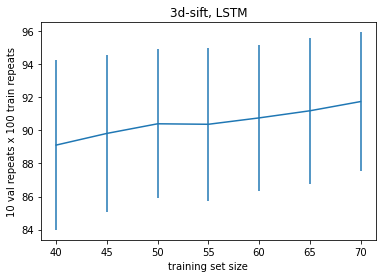

In [16]:
plt.figure()
plt.errorbar(train_sizes, val_acc_means, val_acc_stds)
plt.xlabel('training set size')
plt.ylabel('{} val repeats x {} train repeats'.format(val_its, train_its))
plt.title('3d-sift, LSTM')
plt.savefig('rnn_accs.png')

In [17]:
# np.load('mean_accs.npy')